<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Heart_Desease_Classification_with_20%2B%2B_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd

In [3]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
data=("/content/drive/My Drive/Colab Notebooks/Heart Desease Classification with 10++ Models/heart.csv")

In [5]:
df=pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
pip install catboost

In [10]:
pip install h2o

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import cufflinks as cf 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.linear_model import RidgeClassifier
from catboost import Pool, CatBoostClassifier, cv
import lightgbm as lgb
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import random

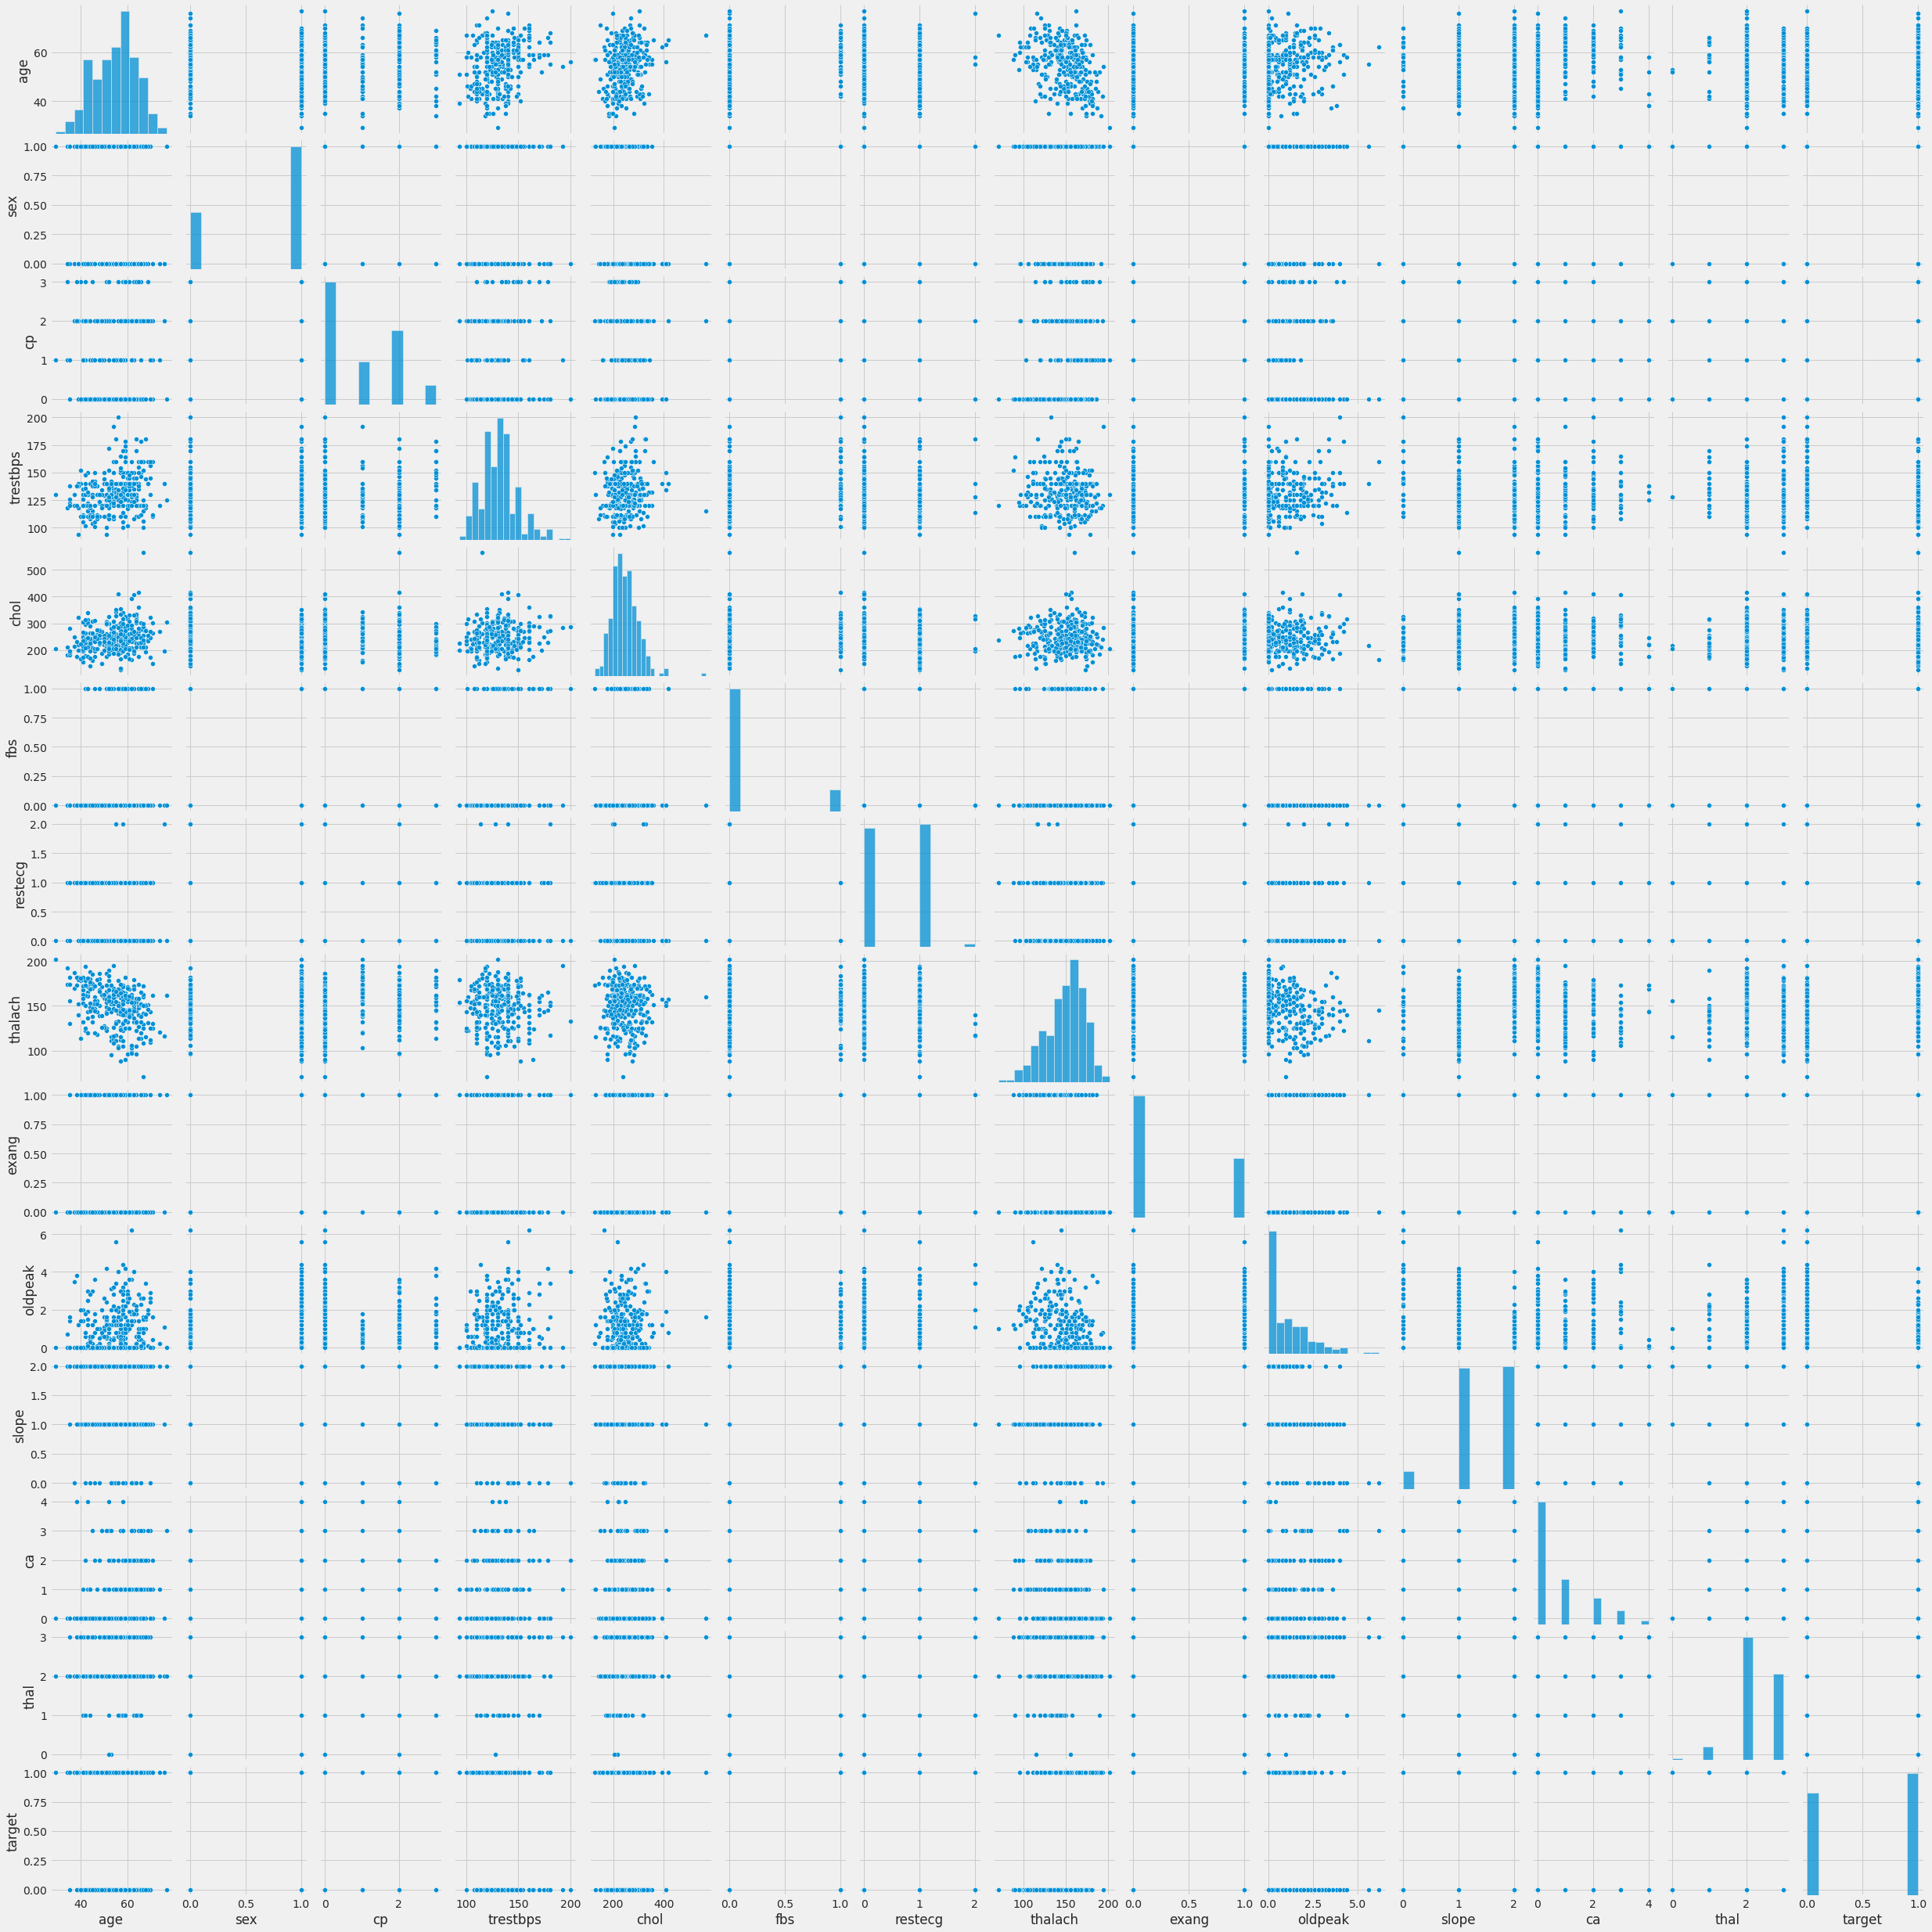

In [12]:
sns.pairplot(df)

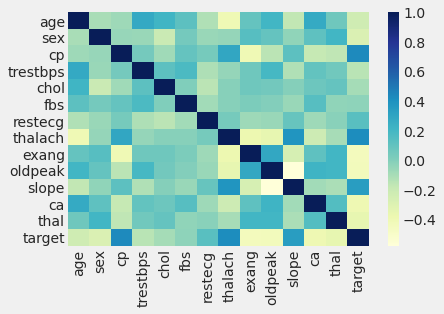

In [13]:
sns.heatmap(df.corr(),cmap="YlGnBu")

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
#Splitting Data Set

X=df.drop(['target'],axis=1)
Y=df['target']
encoder=LabelEncoder()
Y=encoder.fit_transform(Y)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=43)

In [16]:
#1.Logistic Regression

Model=LogisticRegression(max_iter=1000)
Model.fit(X_train,Y_train)
Y_pred=Model.predict(X_test)

#Summary prediction
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print('Akurasi Model yaitu :',accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        41
           1       0.83      0.96      0.89        50

    accuracy                           0.87        91
   macro avg       0.88      0.86      0.86        91
weighted avg       0.88      0.87      0.87        91

[[31 10]
 [ 2 48]]
Akurasi Model yaitu : 0.8681318681318682


In [17]:
#2. K-Nearest Neighbours

Model=KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train,Y_train)
Y_pred=Model.predict(X_test)


#Summary Prediction
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print('Akurasi Model',accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55        41
           1       0.63      0.62      0.63        50

    accuracy                           0.59        91
   macro avg       0.59      0.59      0.59        91
weighted avg       0.59      0.59      0.59        91

[[23 18]
 [19 31]]
Akurasi Model 0.5934065934065934


In [18]:
#3. Decission Tree 

Model3=DecisionTreeClassifier()
Model3.fit(X_train,Y_train)
Model3.predict(X_test)

#Summary Prediction
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print('Akurasi Model yaitu :', accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55        41
           1       0.63      0.62      0.63        50

    accuracy                           0.59        91
   macro avg       0.59      0.59      0.59        91
weighted avg       0.59      0.59      0.59        91

[[23 18]
 [19 31]]
Akurasi Model yaitu : 0.5934065934065934


In [19]:
#4.NaiveBayes

Model4=GaussianNB()
Model4.fit(X_train,Y_train)
Model4.predict(X_test)

#Summary Report
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print('Akurasi Score:',accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55        41
           1       0.63      0.62      0.63        50

    accuracy                           0.59        91
   macro avg       0.59      0.59      0.59        91
weighted avg       0.59      0.59      0.59        91

[[23 18]
 [19 31]]
Akurasi Score: 0.5934065934065934


In [20]:
#5.Linear Discriminant Analysis

Model5=LinearDiscriminantAnalysis()
Model5.fit(X_train,Y_train)
Model5.predict(X_test)

#Sumaary Report
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print('Akurasi Model:',accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55        41
           1       0.63      0.62      0.63        50

    accuracy                           0.59        91
   macro avg       0.59      0.59      0.59        91
weighted avg       0.59      0.59      0.59        91

[[23 18]
 [19 31]]
Akurasi Model: 0.5934065934065934


In [21]:
#6. Light GBM

params = {'objective':'binary', 'metric':'accuracy'}
  
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_test = lgb.Dataset(X_test, Y_test, reference=lgb_train)

Model6 = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_test], verbose_eval=10)
y_pred=Model6.predict(X_test)
print(classification_report(Y_test,Y_pred.round()))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55        41
           1       0.63      0.62      0.63        50

    accuracy                           0.59        91
   macro avg       0.59      0.59      0.59        91
weighted avg       0.59      0.59      0.59        91



In [22]:
#7. CatBoost

Model7=CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)
Model7.fit(X_train,Y_train,eval_set=(X_test,Y_test))

Learning rate set to 0.021603
0:	learn: 0.8726415	test: 0.7912088	best: 0.7912088 (0)	total: 49.8ms	remaining: 49.7s
1:	learn: 0.8867925	test: 0.8461538	best: 0.8461538 (1)	total: 51.2ms	remaining: 25.5s
2:	learn: 0.8962264	test: 0.8571429	best: 0.8571429 (2)	total: 52.5ms	remaining: 17.5s
3:	learn: 0.9009434	test: 0.8571429	best: 0.8571429 (2)	total: 53.8ms	remaining: 13.4s
4:	learn: 0.9056604	test: 0.8351648	best: 0.8571429 (2)	total: 58.2ms	remaining: 11.6s
5:	learn: 0.9056604	test: 0.8351648	best: 0.8571429 (2)	total: 59.2ms	remaining: 9.81s
6:	learn: 0.9103774	test: 0.8351648	best: 0.8571429 (2)	total: 60ms	remaining: 8.51s
7:	learn: 0.9150943	test: 0.8461538	best: 0.8571429 (2)	total: 61.3ms	remaining: 7.6s
8:	learn: 0.9150943	test: 0.8681319	best: 0.8681319 (8)	total: 62.3ms	remaining: 6.86s
9:	learn: 0.9103774	test: 0.8571429	best: 0.8681319 (8)	total: 63.3ms	remaining: 6.26s
10:	learn: 0.9150943	test: 0.8461538	best: 0.8681319 (8)	total: 64.3ms	remaining: 5.78s
11:	learn: 0.91

In [23]:
## CatBoost
y_pred=Model7.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
#Accuracy Score
print('Akurasi Model yaitu : ',accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.55        41
           1       0.63      0.62      0.63        50

    accuracy                           0.59        91
   macro avg       0.59      0.59      0.59        91
weighted avg       0.59      0.59      0.59        91

[[23 18]
 [19 31]]
Akurasi Model yaitu :  0.5934065934065934


In [24]:
#8 XGBoost

Model8=xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
Model8.fit(X_train,Y_train)
Y_pred=Model8.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(Y_test,Y_pred))

[02:49:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.80      0.88      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

[[30 11]
 [ 6 44]]
accuracy is  0.8131868131868132


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:892: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



In [25]:
#9.Ridge Classifier

Model9=RidgeClassifier()
Model9.fit(X_train,Y_train)
Y_pred=Model9.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        41
           1       0.81      0.96      0.88        50

    accuracy                           0.86        91
   macro avg       0.88      0.85      0.85        91
weighted avg       0.87      0.86      0.85        91

[[30 11]
 [ 2 48]]
accuracy is  0.8571428571428571


In [26]:
#10. Quadratic Discriminant Analysis

Model10=QuadraticDiscriminantAnalysis()
Model10.fit(X_train,Y_train)
Y_pred=Model10.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.78        41
           1       0.81      0.86      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[31 10]
 [ 7 43]]
accuracy is  0.8131868131868132


In [27]:
#11. Bagging Classifier

Model11=BaggingClassifier()
Model11.fit(X_train,Y_train)
Y_pred=Model11.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
#Accuracy Score
print('Akurasi model yaitu : ',accuracy_score(Y_test,Y_pred))



              precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

[[30 11]
 [ 9 41]]
Akurasi model yaitu :  0.7802197802197802


In [28]:
#12. MLPClassifier

Model12=MLPClassifier()
Model12.fit(X_train,Y_train)
y_pred=Model12.predict(X_test)
# Summary of the predictions
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(Y_pred,Y_test))



              precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

[[30 11]
 [ 9 41]]
accuracy is  0.7802197802197802


In [29]:
#13 Linear Support Vector Classification
 
Model13 = LinearSVC(max_iter=100000000)
Model13.fit(X_train, Y_train)

Y_pred = Model13.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
# Accuracy score

print('Nilai Akurasi model yaitu :',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82        41
           1       0.81      0.96      0.88        50

    accuracy                           0.86        91
   macro avg       0.88      0.85      0.85        91
weighted avg       0.87      0.86      0.85        91

[[30 11]
 [ 2 48]]
Nilai Akurasi model yaitu : 0.8571428571428571


In [30]:
## 14. Nu-Support Vector Classification

Model14 = NuSVC()
Model14.fit(X_train, Y_train)

Y_pred = Model14.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
# Accuracy score

print('Akurasi Skor model yaitu :',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74        41
           1       0.76      0.94      0.84        50

    accuracy                           0.80        91
   macro avg       0.83      0.79      0.79        91
weighted avg       0.82      0.80      0.80        91

[[26 15]
 [ 3 47]]
Akurasi Skor model yaitu : 0.8021978021978022


In [31]:
## 15. BernoulliNB

Model15 = BernoulliNB()
Model15.fit(X_train, Y_train)

Y_pred = Model15.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
# Accuracy score
print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77        41
           1       0.77      0.96      0.86        50

    accuracy                           0.82        91
   macro avg       0.85      0.81      0.81        91
weighted avg       0.84      0.82      0.82        91

[[27 14]
 [ 2 48]]
accuracy is 0.8241758241758241


In [32]:
#16. Passive Aggressive Classifier

Model16 = PassiveAggressiveClassifier()
Model16.fit(X_train, Y_train)

Y_pred = Model16.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
# Accuracy score
print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.55      1.00      0.71        50

    accuracy                           0.55        91
   macro avg       0.27      0.50      0.35        91
weighted avg       0.30      0.55      0.39        91

[[ 0 41]
 [ 0 50]]
accuracy is 0.5494505494505495


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [33]:
#17. Gradient Boosting Machine
Model17 = GradientBoostingClassifier(n_estimators=100, random_state=9)
Model17.fit(X_train, Y_train)
y_pred = Model17.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
# Accuracy score

print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.55      1.00      0.71        50

    accuracy                           0.55        91
   macro avg       0.27      0.50      0.35        91
weighted avg       0.30      0.55      0.39        91

[[ 0 41]
 [ 0 50]]
accuracy is 0.5494505494505495


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [34]:
#18 Gradient Boosting Machine
Model18 = GradientBoostingClassifier(n_estimators=100, random_state=9)
Model18.fit(X_train, Y_train)
Y_pred = Model18.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
# Accuracy score

print('Akurasi Skor Model yaitu: ',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78        41
           1       0.79      0.92      0.85        50

    accuracy                           0.82        91
   macro avg       0.84      0.81      0.82        91
weighted avg       0.83      0.82      0.82        91

[[29 12]
 [ 4 46]]
Akurasi Skor Model yaitu:  0.8241758241758241


In [35]:
#19 Extra Trees

Model19 = ExtraTreesClassifier(n_estimators=100, max_features=3)
Model19.fit(X_train, Y_train)
Y_pred = Model19.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
# Accuracy score

print('Skor Model yaitu : ',accuracy_score(Y_pred,Y_test))



              precision    recall  f1-score   support

           0       0.92      0.83      0.87        41
           1       0.87      0.94      0.90        50

    accuracy                           0.89        91
   macro avg       0.89      0.88      0.89        91
weighted avg       0.89      0.89      0.89        91

[[34  7]
 [ 3 47]]
Skor Model yaitu :  0.8901098901098901


In [36]:
#20. Random Forest

Model20 = RandomForestClassifier(n_estimators=100, max_features=3)
Model20.fit(X_train, Y_train)
Y_pred = Model20.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
# Accuracy score

print('accuracy is',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        41
           1       0.82      0.94      0.88        50

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91

[[31 10]
 [ 3 47]]
accuracy is 0.8571428571428571


In [37]:
#21Support Vector Machine

Model21 = SVC()
Model21.fit(X_train, Y_train)
Y_pred = Model21.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
# Accuracy score

print('Akurasi Skor :',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.75      0.44      0.55        41
           1       0.66      0.88      0.75        50

    accuracy                           0.68        91
   macro avg       0.70      0.66      0.65        91
weighted avg       0.70      0.68      0.66        91

[[18 23]
 [ 6 44]]
Akurasi Skor : 0.6813186813186813


In [38]:
#22. H2O

import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzpubq7cc
  JVM stdout: /tmp/tmpzpubq7cc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpzpubq7cc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_7azvnk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [39]:
data = h2o.import_file(data)

# Identify predictors and response
x = data.columns
y = "target"
x.remove(y)

data[y] = data[y].asfactor()

aml = H2OAutoML(max_models=20, max_runtime_secs=1500, seed=1)
aml.train(x=x, y=y, training_frame=data)

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


In [40]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20201223_025044_model_2,0.908432,0.380007,0.92001,0.166864,0.348118,0.121186
XGBoost_grid__1_AutoML_20201223_025044_model_3,0.902855,0.384953,0.904292,0.182477,0.349399,0.12208
XGBoost_1_AutoML_20201223_025044,0.901493,0.394027,0.898678,0.184914,0.352895,0.124535
GBM_grid__1_AutoML_20201223_025044_model_1,0.896706,0.404949,0.911659,0.196377,0.361065,0.130368
GBM_4_AutoML_20201223_025044,0.893412,0.417638,0.90444,0.185573,0.365264,0.133418
StackedEnsemble_BestOfFamily_AutoML_20201223_025044,0.893149,0.40754,0.886671,0.181884,0.359385,0.129158
GLM_1_AutoML_20201223_025044,0.892446,0.402469,0.900527,0.174045,0.358261,0.128351
StackedEnsemble_AllModels_AutoML_20201223_025044,0.891744,0.424704,0.894021,0.177075,0.364055,0.132536
XGBoost_grid__1_AutoML_20201223_025044_model_1,0.890316,0.411418,0.894387,0.199407,0.362615,0.13149
GBM_2_AutoML_20201223_025044,0.890206,0.422924,0.892689,0.188603,0.367855,0.135317


In [41]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor

tpot = TPOTClassifier(generations=5, verbosity=2)
tpot.fit(X_train,Y_train)


Generation 1 - Current best internal CV score: 0.830343300110742

Generation 2 - Current best internal CV score: 0.8347729789590254

Generation 3 - Current best internal CV score: 0.8398671096345515

Generation 4 - Current best internal CV score: 0.8398671096345515

Generation 5 - Current best internal CV score: 0.8442967884828348

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.5, min_samples_leaf=9, min_samples_split=12, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [42]:
Y_pred=tpot.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_pred,Y_test))
#Accuracy Score
print('Akurasi Model yaitu : ',accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        41
           1       0.81      0.92      0.86        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

[[30  4]
 [11 46]]
Akurasi Model yaitu :  0.8351648351648352
